In [3]:
!pip install geopy

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ------ -------------------------------- 20.5/125.4 kB 682.7 kB/s eta 0:00:01
   --------------- ----------------------- 51.2/125.4 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from IPython.core.display import display, HTML
import time


C:\Users\deept\AppData\Local\Temp\ipykernel_33012\631953607.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [9]:
df=pd.read_csv('zomato_data.csv')

In [11]:
df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [13]:
df.shape

(51717, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   online_order               51717 non-null  object
 1   book_table                 51717 non-null  object
 2   rate                       43942 non-null  object
 3   votes                      51717 non-null  int64 
 4   rest_type                  51490 non-null  object
 5   dish_liked                 23639 non-null  object
 6   cuisines                   51672 non-null  object
 7   approx_costfor_two_people  51371 non-null  object
 8   listed_intype              51717 non-null  object
 9   listed_incity              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [19]:
df.isnull().sum()

online_order                     0
book_table                       0
rate                          7775
votes                            0
rest_type                      227
dish_liked                   28078
cuisines                        45
approx_costfor_two_people      346
listed_intype                    0
listed_incity                    0
dtype: int64

In [37]:
df[df['cuisines'].str.contains('North Indian', case=False, na=False)]

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
5,Yes,No,3.8/5,286,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51706,No,No,3.7 /5,27,Pub,NaN,"North Indian, Continental","1,200",Pubs and bars,Whitefield
51708,No,No,2.8 /5,161,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200",Pubs and bars,Whitefield
51709,No,No,3.7 /5,34,"Casual Dining, Bar",NaN,"North Indian, Continental",800,Pubs and bars,Whitefield
51711,No,No,2.5 /5,81,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield


In [41]:
df['cuisines'].mode()

0    North Indian
Name: cuisines, dtype: object

In [51]:
df['approx_costfor_two_people'] = df['approx_costfor_two_people'].str.replace(r'[^0-9.]', '', regex=True).astype(float)


In [53]:
df['approx_costfor_two_people'].max()

6000.0

In [59]:
df.loc[df['approx_costfor_two_people'] == df['approx_costfor_two_people'].max(), 'listed_incity']

19139         Indiranagar
45618    Old Airport Road
Name: listed_incity, dtype: object

In [67]:
df.loc[df.groupby('rate')['votes'].max().sort_values(ascending=False),'rest_type']

16832    Casual Dining
16345      Quick Bites
14956      Quick Bites
14726      Quick Bites
12121             Cafe
             ...      
298      Casual Dining
225      Casual Dining
224      Casual Dining
0        Casual Dining
0        Casual Dining
Name: rest_type, Length: 64, dtype: object

In [89]:
df['approx_costfor_two_people'].describe()

count    51371.000000
mean       555.431566
std        438.850728
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: approx_costfor_two_people, dtype: float64

In [91]:
def cont_vis_analysis(data,col):
  ## visualisation of continuous numerical variable
  fig,axes=plt.subplots(1,3,figsize=(8,3),layout='constrained')
  fig.suptitle('Continuous Data Distributions')

  axes[0].set_title('Histogram')
  sns.histplot(data[col],ax=axes[0])

  axes[1].set_title('KDE plot')
  sns.kdeplot(data[col],ax=axes[1])

  axes[2].set_title('Boxplot')
  sns.boxplot(data[col],ax=axes[2])

  fig.show()

def cont_non_vis_analysis(data,col):
  ## Non visual analaysis of continuous numerical data
  series=data[col]
  print(series.agg(['count','min','max','mean','median','var','std','skew','kurt']).round(2))
  # round(2) - round off values upto 2 decimals
  print()


def catg_disc_analysis(data,col):
  # EDA of categorical and discrete num data
  print("Value Counts for ",col)
  print(data[col].value_counts())
  print("Null values =",data[col].isna().sum())
  fig,axes=plt.subplots(1,2,figsize=(8,3),layout='constrained')
  fig.suptitle('Categorical / Discrete Num Data Distributions')

  axes[0].set_title('Bar Plot')
  sns.countplot(x=col,data=data,ax=axes[0])

  axes[1].set_title('Pie Chart')
  vc_data=data[col].value_counts()
  axes[1].pie(vc_data,labels=vc_data.index,autopct='%1.1f%%')
  fig.show()

Value Counts for  listed_incity
listed_incity
BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: count, dtype: int64
Null values = 0


C:\Users\deept\AppData\Local\Temp\ipykernel_33012\2274706611.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


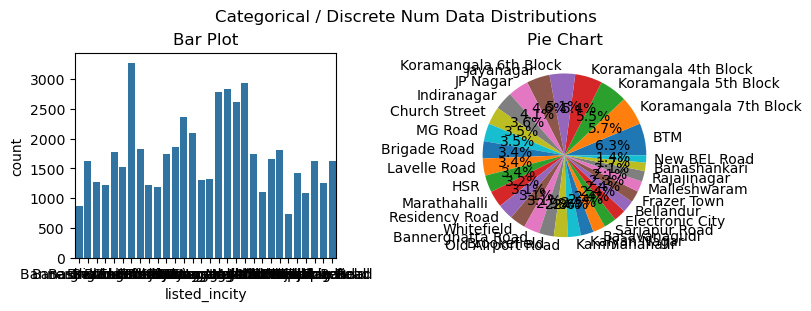

In [93]:
catg_disc_analysis(df,'listed_incity')

Value Counts for  rest_type
rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64
Null values = 227


C:\Users\deept\AppData\Local\Temp\ipykernel_33012\2274706611.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


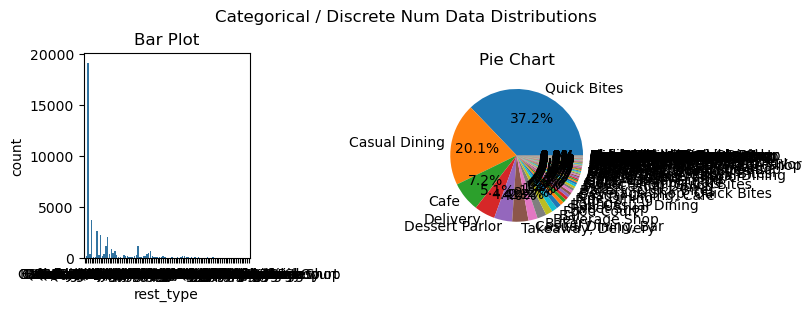

In [217]:
catg_disc_analysis(df,'rest_type')

In [95]:
## Cont-Cont
def cont_cont_bivar_analysis(data,col1,col2):
  print(f"Covariance = {data[col1].cov(data[col2])}")
  print(f"Correlation = {data[col1].corr(data[col2])}")
  plt.figure(figsize=(3,3))
  sns.scatterplot(x=col1,y=col2,data=data)
  plt.show()

# cont - cat bivariate
def cont_cat_bivar_analysis(data,cat_col,num_col):
  plt.figure(figsize=(3,3))
  sns.boxplot(x=cat_col,y=num_col,data=data)

In [197]:
## cat - cat bivariate
def cat_cat_bivar_analysis(data,col1,col2):
    ct_data=pd.crosstab(data[col1],data[col2])
    ct_data.plot(kind='bar')

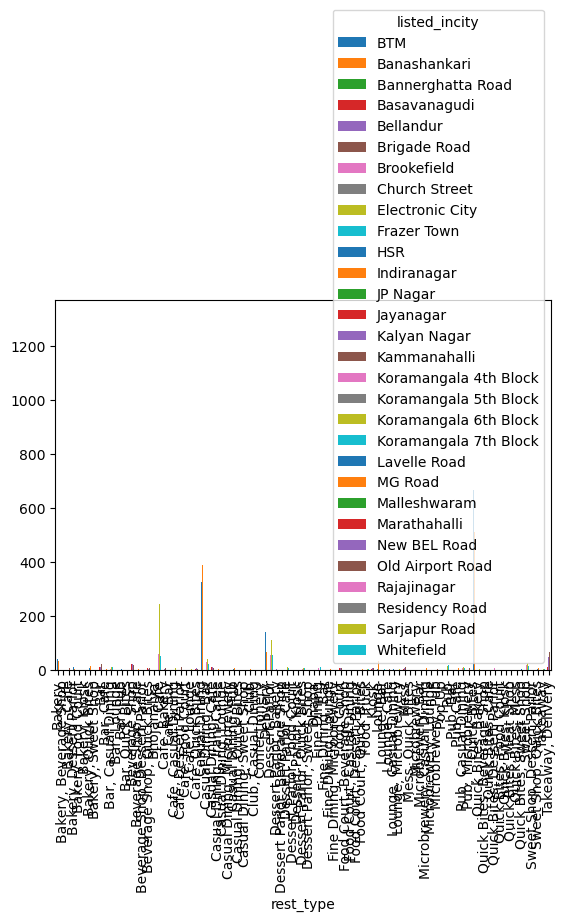

In [199]:
cat_cat_bivar_analysis(df,'rest_type','listed_incity')

In [114]:
df.groupby(['online_order', 'listed_incity']).size().reset_index(name='count')

,online_order,listed_incity,count
0,No,BTM,1148
1,No,Banashankari,317
2,No,Bannerghatta Road,607
3,No,Basavanagudi,472
4,No,Bellandur,406
5,No,Brigade Road,853
6,No,Brookefield,552
7,No,Church Street,939
8,No,Electronic City,665
9,No,Frazer Town,472


In [132]:
df[(df['listed_incity'] == 'Banashankari') & (df['online_order'] == 'Yes')]


,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
5,Yes,No,3.8/5,286,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,Buffet,Banashankari
7,Yes,Yes,4.6/5,2556,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...
839,Yes,No,3.7/5,57,Quick Bites,NaN,"Juices, South Indian, Chinese, Fast Food",200.0,Dine-out,Banashankari
840,Yes,No,3.2/5,71,Quick Bites,NaN,"Burger, Fast Food, Beverages",600.0,Dine-out,Banashankari
841,Yes,No,NaN,0,Quick Bites,NaN,"North Indian, Chinese",300.0,Dine-out,Banashankari
851,Yes,No,3.2/5,11,Quick Bites,NaN,"Beverages, Fast Food",150.0,Dine-out,Banashankari


In [144]:
df[df['online_order'] == 'Yes']

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
5,Yes,No,3.8/5,286,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,Buffet,Banashankari
7,Yes,Yes,4.6/5,2556,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51697,Yes,Yes,4.4 /5,1313,"Casual Dining, Bar","California Roll, Cocktails, Mocktails, Maki Ro...","Asian, Japanese, Vietnamese, Korean, Chinese, ...",1800.0,Pubs and bars,Whitefield
51699,Yes,Yes,4.1 /5,1218,Pub,"Cocktails, Beer, Long Island Iced Tea, Pasta, ...","Asian, American, Mexican",1200.0,Pubs and bars,Whitefield
51701,Yes,Yes,4.1 /5,673,Pub,"Cocktails, Wheat Beer, Bruschettas, Pasta, Bur...","Finger Food, North Indian, Chinese, Italian",1400.0,Pubs and bars,Whitefield
51703,Yes,Yes,3.9 /5,548,"Pub, Casual Dining","Pizza, Beer, Cocktails, Nachos, Pasta, Moo Bur...","Finger Food, American, Continental, Burger, Pizza",1500.0,Pubs and bars,Whitefield


In [156]:
# Calculate percentage of online orders in Banashankari
total_online_orders = df['online_order'].shape[0]
banashankari_online_orders = df[(df['listed_incity'] == 'Banashankari')].shape[0]

percentage = (banashankari_online_orders / total_online_orders) * 100
print(f"Percentage of online orders in Banashankari: {percentage:.2f}%")

Percentage of online orders in Banashankari: 1.67%


In [150]:
# Calculate percentage of online orders in Banashankari
total_online_orders = df[df['online_order'] == 'Yes'].shape[0]
banashankari_online_orders = df[(df['online_order'] == 'Yes') & (df['listed_incity'] == 'Banashankari')].shape[0]

percentage = (banashankari_online_orders / total_online_orders) * 100
print(f"Percentage of online orders in Banashankari: {percentage:.2f}%")

Percentage of online orders in Banashankari: 1.79%


In [168]:
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')  # Converts to float

In [176]:
df['votes_gt_500'] = df['votes'] > 500  # Creates a boolean column (True/False)
df['votes_gt_500'] = df['votes_gt_500'] = True
df['rate_3'] = df['rate'] < 3 
df['rate'] =df['rate'] == True
df1=df.groupby(['rest_type', 'listed_incity', 'votes_gt_500','rate_3']).size().reset_index(name='count')
df1[df1['rate_3'] == True]

,rest_type,listed_incity,votes_gt_500,rate_3,count
0,Bakery,BTM,True,True,68
1,Bakery,Banashankari,True,True,21
2,Bakery,Bannerghatta Road,True,True,46
3,Bakery,Basavanagudi,True,True,40
4,Bakery,Bellandur,True,True,36
...,...,...,...,...,...
1481,"Takeaway, Delivery",Old Airport Road,True,True,66
1482,"Takeaway, Delivery",Rajajinagar,True,True,27
1483,"Takeaway, Delivery",Residency Road,True,True,32
1484,"Takeaway, Delivery",Sarjapur Road,True,True,50


In [186]:
df['votes_gt_500'] = df['votes'] > 500  # Creates a boolean column
df['rate_3'] = df['rate'] < 3           # Keeps restaurants with ratings < 3

# Group by restaurant type, city, vote threshold, and rating threshold
df1=df.groupby(['listed_incity', 'votes_gt_500', 'rate_3']).size().reset_index(name='count')
df1[(df1['votes_gt_500'] == True) & (df1['rate_3'] == True)]


,listed_incity,votes_gt_500,rate_3,count
1,BTM,True,True,418
3,Banashankari,True,True,82
5,Bannerghatta Road,True,True,116
7,Basavanagudi,True,True,151
9,Bellandur,True,True,136
11,Brigade Road,True,True,318
13,Brookefield,True,True,143
15,Church Street,True,True,331
17,Electronic City,True,True,59
19,Frazer Town,True,True,131


In [205]:
df2=df.groupby(['rest_type', 'listed_incity']).size().reset_index(name='count')

In [215]:
df2 = df.groupby(['rest_type', 'listed_incity']).size().reset_index(name='count')

# Filter rows where 'count' is at its minimum
df2[df2['count'] == df2['count'].min()]

,rest_type,listed_incity,count
31,"Bakery, Beverage Shop",Basavanagudi,1
33,"Bakery, Beverage Shop",Church Street,1
34,"Bakery, Beverage Shop",Jayanagar,1
35,"Bakery, Beverage Shop",Koramangala 5th Block,1
36,"Bakery, Beverage Shop",Koramangala 6th Block,1
...,...,...,...
1437,Takeaway,Indiranagar,1
1440,Takeaway,Kalyan Nagar,1
1441,Takeaway,Kammanahalli,1
1449,Takeaway,Marathahalli,1


In [225]:
# Create boolean columns for Buffet and Delivery
df['Buffet'] = df['listed_intype'] == 'Buffet'  
df['del'] = df['listed_intype'].str.contains('delivery', case=False, na=False)

# Calculate the average cost for Buffet and Delivery separately
buffet_avg_cost = df[df['Buffet']]['approx_costfor_two_people'].mean()
delivery_avg_cost = df[df['del']]['approx_costfor_two_people'].mean()

totl=buffet_avg_cost-delivery_avg_cost

print(f"Average cost for Buffet: {buffet_avg_cost:.2f}")
print(f"Average cost for Delivery: {delivery_avg_cost:.2f}")
print(f"Average cost for Delivery: {totl:.2f}")

Average cost for Buffet: 1306.66
Average cost for Delivery: 464.49
Average cost for Delivery: 842.17


In [ ]:
# Calculate percentage of online orders in Banashankari
total_online_orders = df[df['online_order'] == 'Yes'].shape[0]
banashankari_online_orders = df[(df['online_order'] == 'Yes') & (df['listed_incity'] == 'Banashankari')].shape[0]

percentage = (banashankari_online_orders / total_online_orders) * 100
print(f"Percentage of online orders in Banashankari: {percentage:.2f}%")

In [237]:
df2 = df.groupby(['online_order', 'votes','listed_incity']).size().reset_index(name='count')

In [239]:
df2

,online_order,votes,listed_incity,count
0,No,0,BTM,404
1,No,0,Banashankari,105
2,No,0,Bannerghatta Road,256
3,No,0,Basavanagudi,135
4,No,0,Bellandur,146
...,...,...,...,...
14376,Yes,9084,Koramangala 6th Block,1
14377,Yes,9084,Koramangala 7th Block,3
14378,Yes,9085,Koramangala 7th Block,2
14379,Yes,16345,Bellandur,3


In [255]:
# Filter restaurants that serve both North Indian and Chinese cuisines
df_filtered = df[df['cuisines'].str.contains('North Indian', case=False, na=False) | 
                 df['cuisines'].str.contains('Chinese', case=False, na=False)]

# Calculate the average rating
average_rating = df_filtered['rate'].mean()
print(f"Average rating for North Indian & Chinese restaurants: {average_rating:.2f}")

Average rating for North Indian & Chinese restaurants: 0.00


In [257]:
# Filter restaurants that serve both North Indian and Chinese cuisines
df_filtered = df[df['cuisines'].str.contains('North Indian, Chinese', case=False, na=False)]

# Calculate the average rating
average_rating = df_filtered['rate'].mean()
print(f"Average rating for North Indian & Chinese restaurants: {average_rating:.2f}")

Average rating for North Indian & Chinese restaurants: 0.00


In [243]:
dfdf['cui']

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: cui, Length: 51717, dtype: bool